In [ ]:
!pip install ultralytics
!pip install opencv-python


In [2]:
import cv2
from ultralytics import YOLO
import numpy as np
from google.colab.patches import cv2_imshow


In [10]:
from ultralytics import YOLO

# Load a pretrained YOLOv8 model
model = YOLO("yolov8n.pt")


In [11]:
from google.colab import files
uploaded = files.upload()


Saving WhatsApp Image 2024-04-16 at 14.08.00_b60e9677.jpg to WhatsApp Image 2024-04-16 at 14.08.00_b60e9677 (1).jpg



0: 640x640 1 person, 1 tie, 279.0ms
Speed: 7.3ms preprocess, 279.0ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)


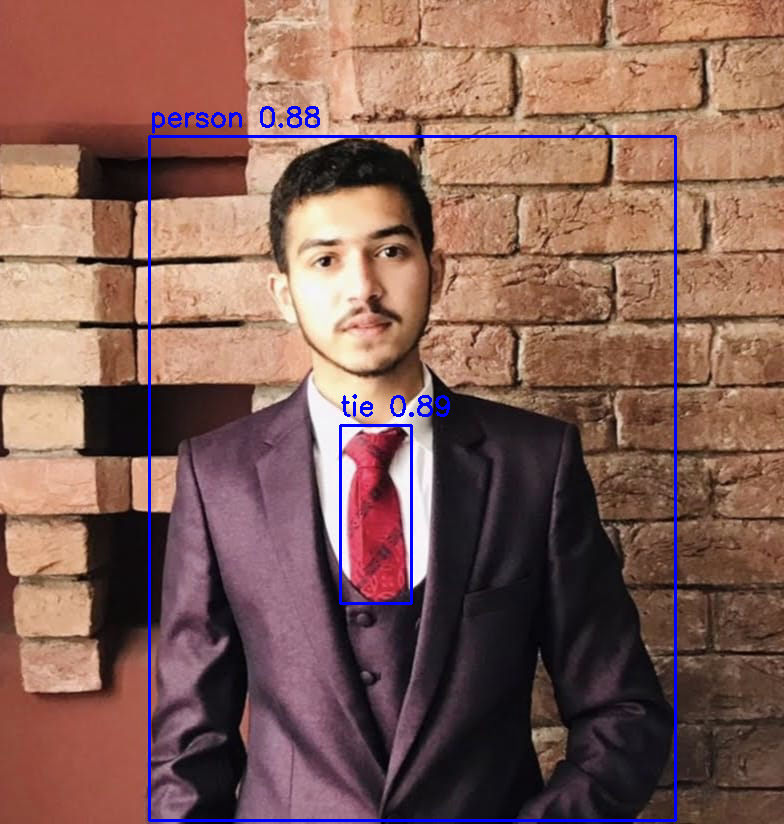

In [12]:
import cv2
from ultralytics import YOLO
from google.colab.patches import cv2_imshow

# Load YOLOv8 model
model = YOLO("yolov8n.pt")

# Define the video file path
video_path = list(uploaded.keys())[0]

# Open the video file
cap = cv2.VideoCapture(video_path)

if not cap.isOpened():
    print("Error: Could not open video file.")
else:
    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break

        # Perform object detection
        results = model(frame)

        # Access detection results
        if results:
            for result in results:
                boxes = result.boxes  # Access boxes attribute
                for box in boxes:
                    x1, y1, x2, y2 = map(int, box.xyxy[0])
                    conf = box.conf[0]
                    cls = box.cls[0]
                    label = f'{model.names[int(cls)]} {conf:.2f}'

                    # Draw bounding boxes on the frame
                    cv2.rectangle(frame, (x1, y1), (x2, y2), (255, 0, 0), 2)
                    cv2.putText(frame, label, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (255, 0, 0), 2)

        # Display the frame with bounding boxes
        cv2_imshow(frame)

    cap.release()
    cv2.destroyAllWindows()


In [13]:
import cv2
from ultralytics import YOLO
from google.colab.patches import cv2_imshow

# Load YOLOv8 model
model = YOLO("yolov8n.pt")

# Define the input and output video file paths
video_path = list(uploaded.keys())[0]
output_path = '/content/processed_video.mp4'

# Open the input video file
cap = cv2.VideoCapture(video_path)

# Check if the video was opened successfully
if not cap.isOpened():
    print("Error: Could not open video file.")
else:
    # Get video properties
    frame_width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
    frame_height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
    fps = cap.get(cv2.CAP_PROP_FPS)

    # Define codec and create VideoWriter object
    fourcc = cv2.VideoWriter_fourcc(*'mp4v')  # Codec for .mp4 files
    out = cv2.VideoWriter(output_path, fourcc, fps, (frame_width, frame_height))

    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break

        # Perform object detection
        results = model(frame)

        # Access detection results
        if results:
            for result in results:
                boxes = result.boxes  # Access boxes attribute
                for box in boxes:
                    x1, y1, x2, y2 = map(int, box.xyxy[0])
                    conf = box.conf[0]
                    cls = box.cls[0]
                    label = f'{model.names[int(cls)]} {conf:.2f}'

                    # Draw bounding boxes on the frame
                    cv2.rectangle(frame, (x1, y1), (x2, y2), (255, 0, 0), 2)
                    cv2.putText(frame, label, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (255, 0, 0), 2)

        # Write the frame with bounding boxes to the output video
        out.write(frame)

    # Release resources
    cap.release()
    out.release()
    cv2.destroyAllWindows()

    print("Processed video saved to", output_path)



0: 640x640 1 person, 1 tie, 298.4ms
Speed: 8.1ms preprocess, 298.4ms inference, 2.5ms postprocess per image at shape (1, 3, 640, 640)
Processed video saved to /content/processed_video.mp4
